In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import seaborn as sns

In [77]:
df_transactions_wofirstname = pd.read_csv("C:/Users/felix.oechslein/Desktop/Daten, 13.12.22/Rohdaten/" +
                                    "Thalia_transactions_ohne_vorname.csv")

df_history_wofirstname = pd.read_csv("C:/Users/felix.oechslein/Desktop/Daten, 13.12.22/Rohdaten/" +
                                    "Thalia_history_ohne_vorname.csv")

In [78]:
df_privatkunden_iids = pd.read_csv("C:/Users/felix.oechslein/Desktop/Daten, 13.12.22/" +
                                    "privatkunden.iid.thalia.csv", index_col = [0])

# Herausfiltern aller iids die Privatkunden sind und im Jahr x ihre erste Bestellung tätigten

In [79]:
df_transactions_wofirstname

,mandator,id,iid,attrtype,key,itemkey,status,productid,productname,modifiedprovider,createdprovider,startdate,quantity,discountname,saleschannelname,price,discountgroup,discountamount,pricetotal
0,100000490,262615460,100279806,OR,JET_1_a1179092,NaN,Order,NaN,NaN,20220701153023,20220630111759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100000490,262615461,100279806,TI,JET_1_a1179092,JET_1_a1179092_1_1_0,Order,JET_1_3941,Maria Stuart und Elisabeth,20220701153023,20220630111759,2.022063e+13,1.0,NaN,Kasse,20.5,NaN,NaN,20.5
2,100000490,262617949,101270948,OR,JET_1_a1179145,NaN,Order,NaN,NaN,20220701153507,20220630135500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100000490,262616022,262428540,OR,JET_1_a1179095,NaN,Order,NaN,NaN,20220701153131,20220630113800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100000490,262616023,262428540,TI,JET_1_a1179095,JET_1_a1179095_1_1_0,Order,JET_1_3618,book.beat,20220701153131,20220630113800,2.022063e+13,1.0,NaN,Gateway,5.0,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925400,100000490,262282320,262191430,TI,JET_1_r411535,JET_1_r411535_1_0,cancelled,JET_1_3941,Maria Stuart und Elisabeth,20220701151856,20220627124551,2.022063e+13,1.0,Geschäftspartnerkarte,Kasse,11.0,Freikarten,NaN,0.0
1925401,100000490,262283681,262193496,RV,JET_1_r411548,NaN,cancelled,NaN,NaN,20220701151909,20220627133454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1925402,100000490,262283682,262193496,TI,JET_1_r411548,JET_1_r411548_1_0,cancelled,JET_1_3941,Maria Stuart und Elisabeth,20220701151909,20220627133454,2.022063e+13,1.0,NaN,Kasse,11.0,NaN,NaN,11.0
1925403,100000490,262377861,262282711,TI,JET_1_r411578,JET_1_r411578_2_0,cancelled,JET_1_3618,book.beat,20220701151930,20220628173144,2.022063e+13,1.0,NaN,Kasse,5.0,NaN,NaN,5.0


In [80]:
#Transaktions-Daten bereinigen

df_t_bereinigt = df_transactions_wofirstname[["iid", "key", "attrtype", "status", "pricetotal", "createdprovider"]]
df_t_bereinigt = df_t_bereinigt.query('attrtype == "TI"')
df_t_bereinigt = df_t_bereinigt.query('status == "Buchung" or status == "Order"')
df_t_bereinigt = df_t_bereinigt.query('pricetotal >= 0.01')
df_t_bereinigt.head()

,iid,key,attrtype,status,pricetotal,createdprovider
1,100279806,JET_1_a1179092,TI,Order,20.5,20220630111759
4,262428540,JET_1_a1179095,TI,Order,5.0,20220630113800
5,262429050,JET_1_a1179096,TI,Order,20.5,20220630115500
7,262429050,JET_1_a1179096,TI,Order,9.0,20220630115500
10,262429655,JET_1_a1179100,TI,Order,55.0,20220630121500


In [81]:
# Privatkunden iids mit Transaktionsdaten mergen
df_t = pd.merge(df_t_bereinigt, df_privatkunden_iids, on = ["iid"])
df_t.head()

,iid,key,attrtype,status,pricetotal,createdprovider
0,100279806,JET_1_a1179092,TI,Order,20.5,20220630111759
1,100279806,JET_1_a1192486,TI,Order,25.0,20220924182326
2,100279806,JET_1_a1192486,TI,Order,25.0,20220924182326
3,100279806,JET_1_a1064841,TI,Buchung,28.9,20200904205800
4,100279806,JET_1_a1064841,TI,Buchung,28.9,20200904205800


<AxesSubplot:>

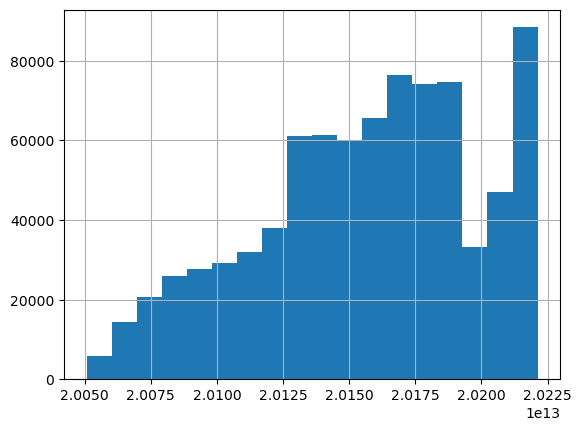

In [82]:
df_t["createdprovider"].hist(bins = 18)

# Betrachtung der History Daten

-> Ergebnis: Großteil der History Daten fallen in Corona Zeitraum

In [83]:
df_h = df_history_wofirstname

In [84]:
df_h.head()

,mandator,id,iid,attrtype,akey,text,creation
0,100000490,240963737,100253777,NO,240805772,|msg=Einladung_Fraternitee_Lounge|userAgent=Ap...,20220330211124
1,100000490,240963360,100256545,NO,240805772,|msg=Einladung_Fraternitee_Lounge|userAgent=Mo...,20220330204021
2,100000490,240963376,100083508,NO,232751147,|msg=NL_April_1_2022|userAgent=Thunderbird 91....,20220330204142
3,100000490,240963381,100256545,NO,240805772,|msg=Einladung_Fraternitee_Lounge|userAgent=Mo...,20220330204152
4,100000490,240963383,100922912,NO,227354388,|msg=NL_März_2_2022|userAgent=Apple Mail (OS X...,20220330204217


In [85]:
df_h["creation"] = pd.to_datetime(df_h["creation"], format='%Y%m%d%H%M%S')
#df_h["CreatedProvider"] = pd.to_datetime(df_h['createdprovider'], format='%Y%m%d%H%M%S')

In [86]:
df_h.set_index('creation', inplace=True)
df_h.head()

,mandator,id,iid,attrtype,akey,text
creation,,,,,,
2022-03-30 21:11:24,100000490,240963737,100253777,NO,240805772,|msg=Einladung_Fraternitee_Lounge|userAgent=Ap...
2022-03-30 20:40:21,100000490,240963360,100256545,NO,240805772,|msg=Einladung_Fraternitee_Lounge|userAgent=Mo...
2022-03-30 20:41:42,100000490,240963376,100083508,NO,232751147,|msg=NL_April_1_2022|userAgent=Thunderbird 91....
2022-03-30 20:41:52,100000490,240963381,100256545,NO,240805772,|msg=Einladung_Fraternitee_Lounge|userAgent=Mo...
2022-03-30 20:42:17,100000490,240963383,100922912,NO,227354388,|msg=NL_März_2_2022|userAgent=Apple Mail (OS X...


In [93]:
df_h.resample('1M').nunique()

,mandator,id,iid,attrtype,akey,text
creation,,,,,,
2020-04-30,1,252,58,3,1,184
2020-05-31,1,79755,20966,4,3,62234
2020-06-30,1,345620,138038,4,9,265955
2020-07-31,1,8456,3687,3,7,4920
2020-08-31,1,84200,22485,4,22,65295
2020-09-30,1,105672,29099,3,63,78798
2020-10-31,1,160716,33378,3,111,121049
2020-11-30,1,55240,23996,4,97,38658
2020-12-31,1,55790,16241,3,82,43529
